# Vehicle Price Prediction

This Vehicle Price Prediction Model is designed to estimate the selling price of a vehicle based on various attributes to help both sellers and buyers make informed decision.

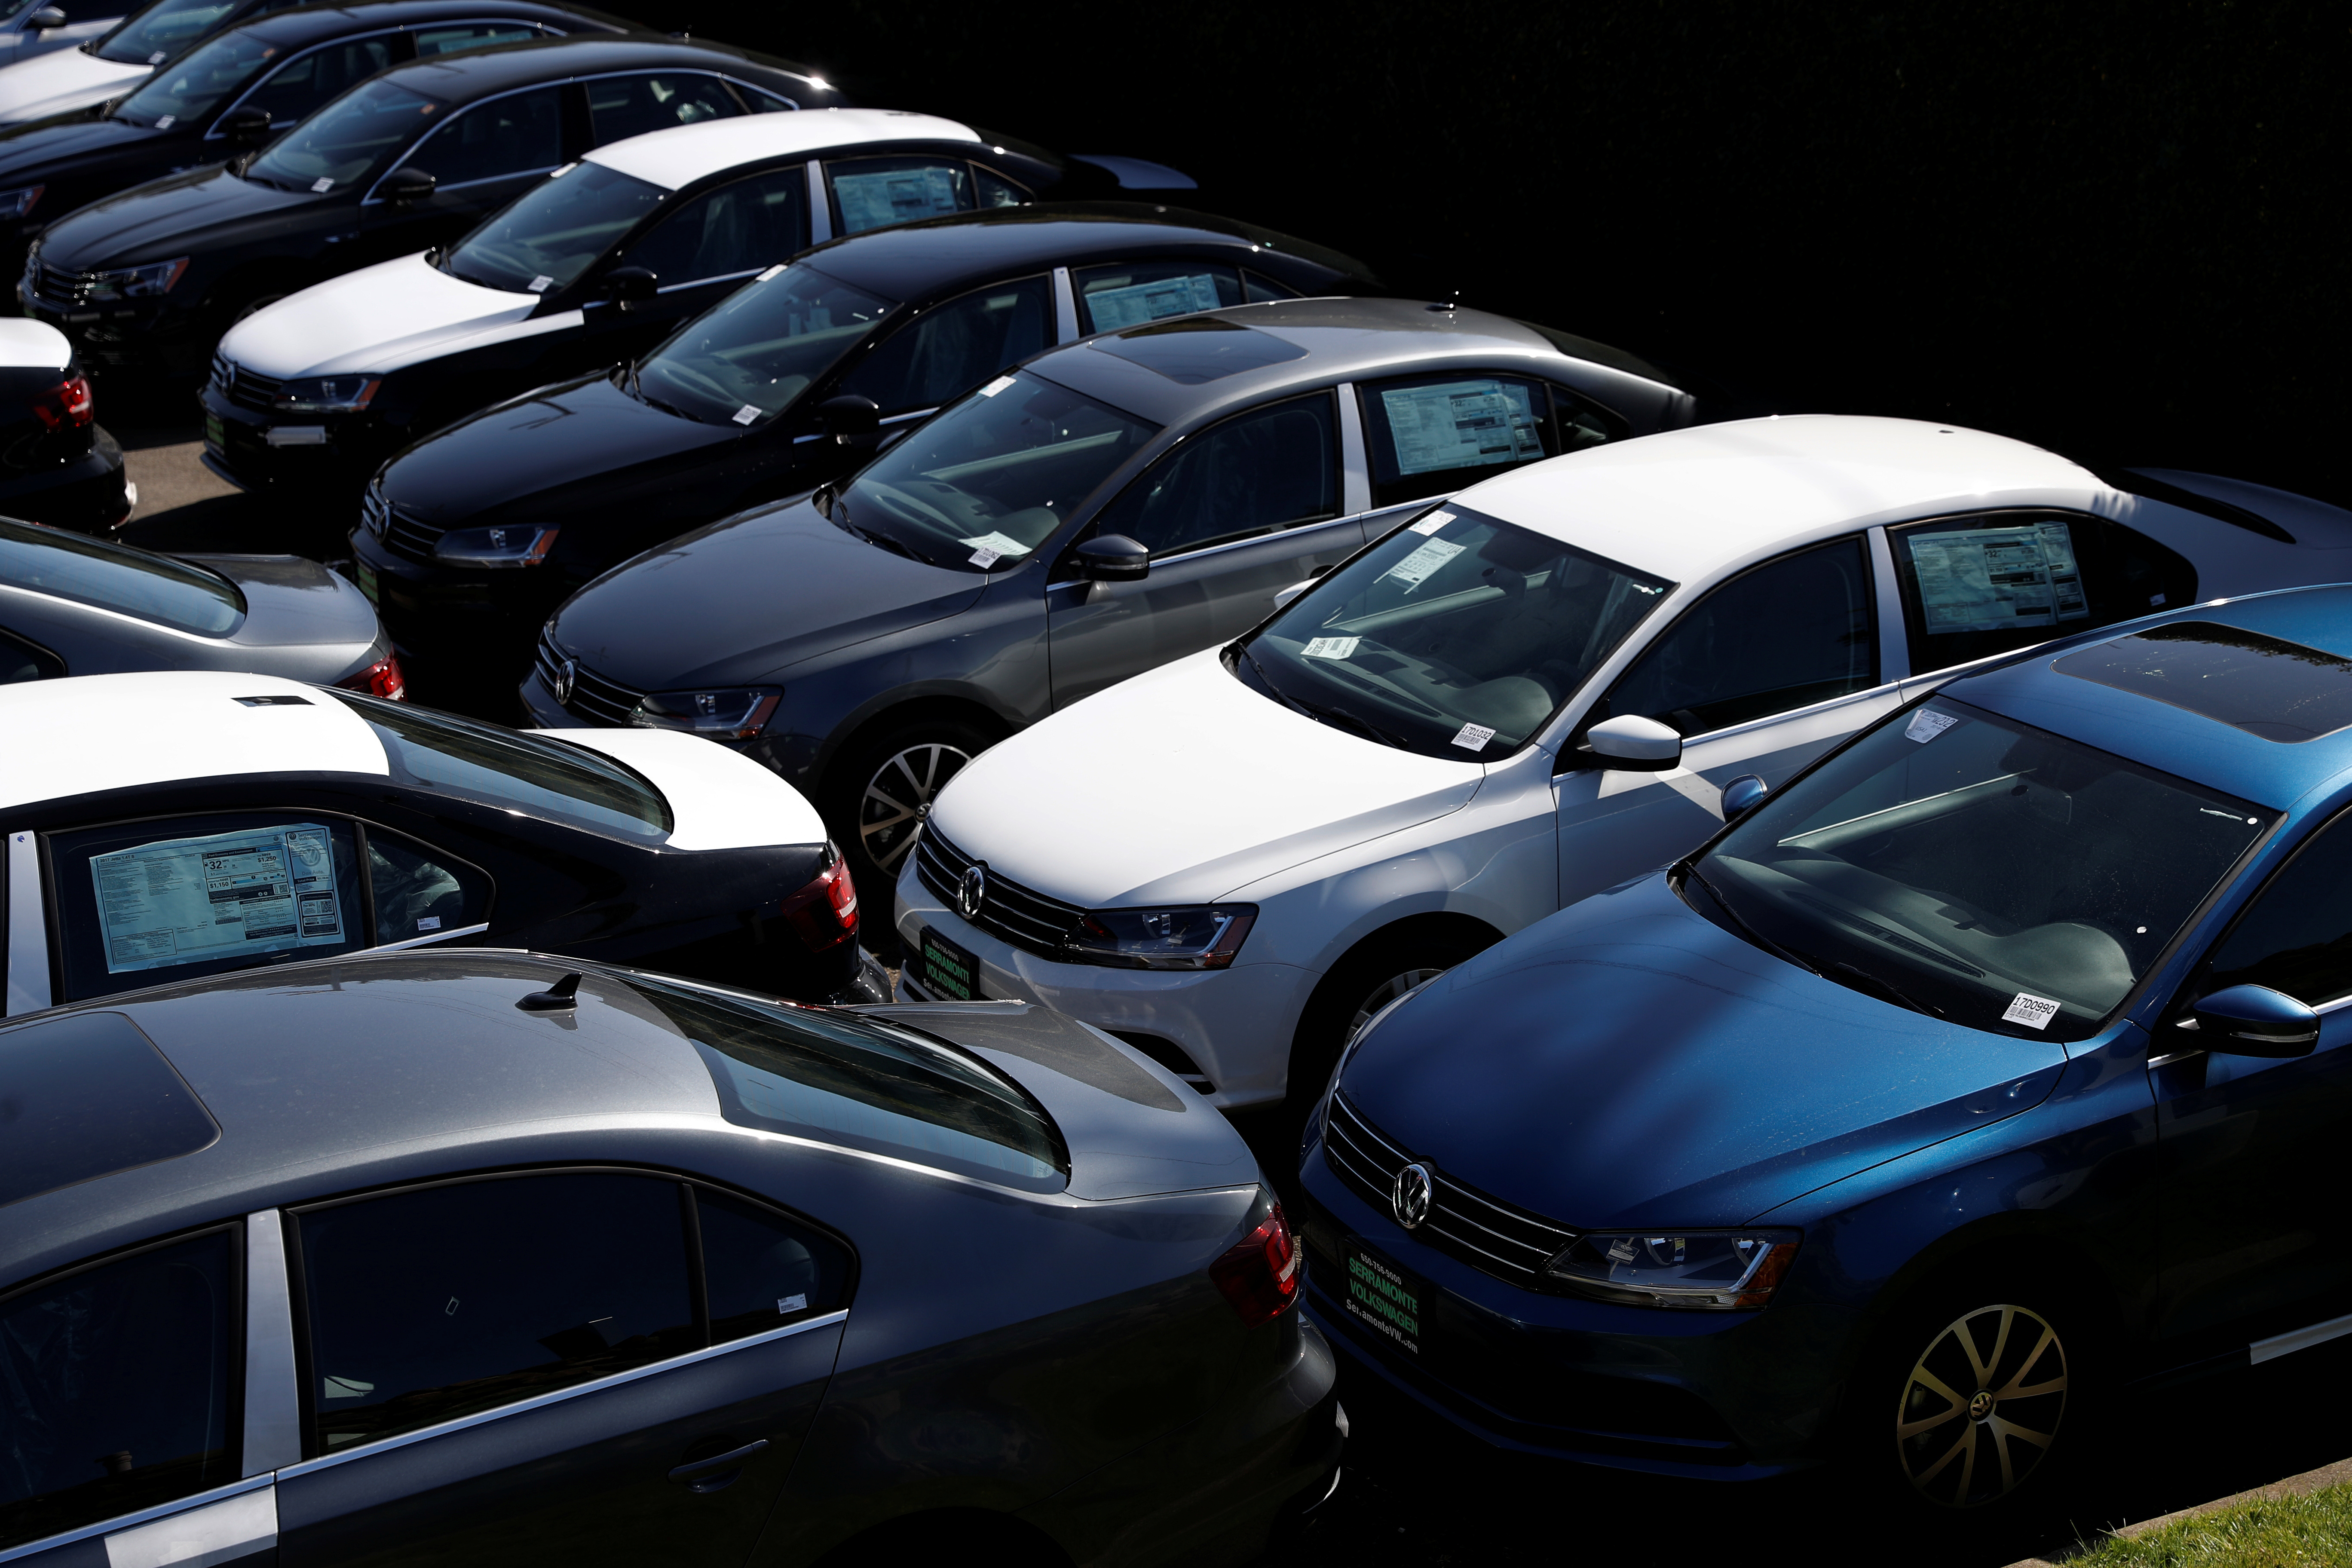

## About the data set

The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

1. **year**: The manufacturing year of the vehicle.

2. **make**: The brand or manufacturer of the vehicle.

3. **model**: The specific model of the vehicle.

4. **trim**: Additional designation for the vehicle model.

5. **body**: The body type of the vehicle (e.g., SUV, Sedan).

6. **transmission**: The type of transmission in the vehicle (e.g., automatic).

7. **vin**: Vehicle Identification Number, a unique code for each vehicle.

8. **state**: The state where the vehicle is registered.

9. **condition**: Condition of the vehicle, possibly rated on a scale.

10. **odometer**: The mileage or distance traveled by the vehicle.

11. **color**: Exterior color of the vehicle.

12. **interior**: Interior color of the vehicle.

13. **seller**: The entity selling the vehicle.

14. **mmr**: Manheim Market Report, possibly indicating the estimated market value of the vehicle.

15. **sellingprice**: The price at which the vehicle was sold.

16. **saledate**: The date and time when the vehicle was sold.

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import joblib
from sklearn.linear_model import LinearRegression

In [2]:
#Filepath of the dataset
file_path = "car_prices.csv"

In [3]:
# Load the dataset
cp_data = pd.read_csv(file_path)

In [4]:
#Check the first few rows of the dataset
cp_data.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [5]:
#Check the last few rows of the dataset
cp_data.tail()

year    make   model         trim       body transmission  \
558832  2015     Kia    K900       Luxury      Sedan          NaN   
558833  2012     Ram    2500  Power Wagon   Crew Cab    automatic   
558834  2012     BMW      X5    xDrive35d        SUV    automatic   
558835  2015  Nissan  Altima        2.5 S      sedan    automatic   
558836  2014    Ford   F-150          XLT  SuperCrew    automatic   

                      vin state  condition  odometer   color interior  \
558832  knalw4d4xf6019304    in       45.0   18255.0  silver    black   
558833  3c6td5et6cg112407    wa        5.0   54393.0   white    black   
558834  5uxzw0c58cl668465    ca       48.0   50561.0   black    black   
558835  1n4al3ap0fc216050    ga       38.0   16658.0   white    black   
558836  1ftfw1et2eke87277    ca       34.0   15008.0    gray     gray   

                                                   seller      mmr  \
558832                                   avis corporation  35300.0   
558833                                    i -5 uhlmann rv  30200.0   
558834             financial services remarketing (lease)  29800.0   
558835  enterprise vehicle exchange / tra / rental / t...  15100.0   
558836                   ford motor credit company llc pd  29600.0   

        sellingprice                                 saledate  
558832       33000.0  Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)  
558833       30800.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558834       34000.0  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558835       11100.0  Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)  
558836       26700.0  Thu May 28 2015 05:30:00 GMT-0700 (PDT)

In [6]:
#Display basic information about the dataset
cp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
# Summary statistics for numerical features
num_summary = cp_data.describe()
num_summary

year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000

In [8]:
# Display summary statistics for categorical features
cat_summary = cp_data.describe(include=['O'])
cat_summary

make   model    trim    body transmission        vin   state  \
count   548536  548438  548186  545642       493485     558833  558837   
unique      96     973    1963      87            4     550297      64   
top       Ford  Altima    Base   Sedan    automatic  automatic      fl   
freq     93554   19349   55817  199437       475915         22   82945   

         color interior              seller  \
count   558088   558088              558837   
unique      46       17               14263   
top      black    black  nissan-infiniti lt   
freq    110970   244329               19693   

                                       saledate  
count                                    558825  
unique                                     3766  
top     Tue Feb 10 2015 01:30:00 GMT-0800 (PST)  
freq                                       5334

In [9]:
#Check for dupicate rows
duplicates = cp_data[cp_data.duplicated()]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print(f"Found {len(duplicates)} duplicate rows.")


No duplicate rows found.


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


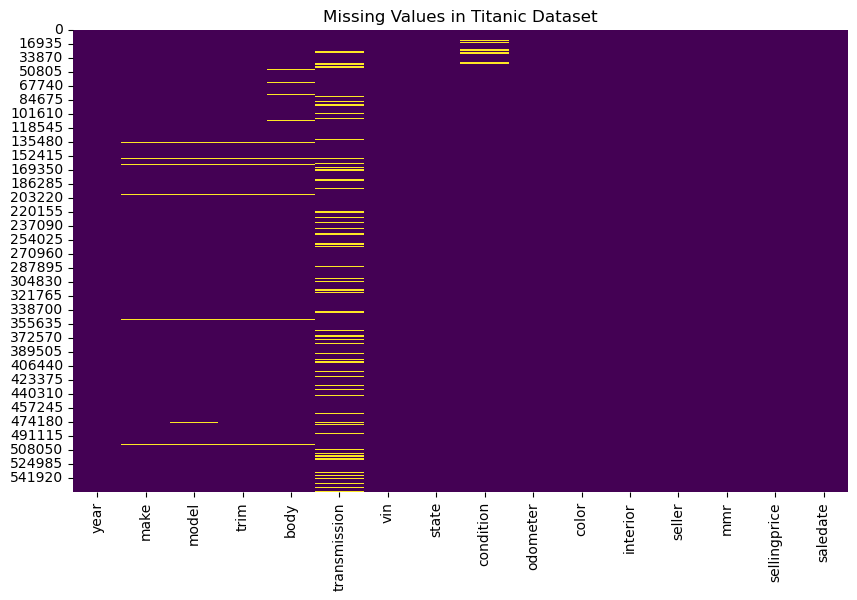

In [10]:
# Check for missing values
missing_values = cp_data.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(cp_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

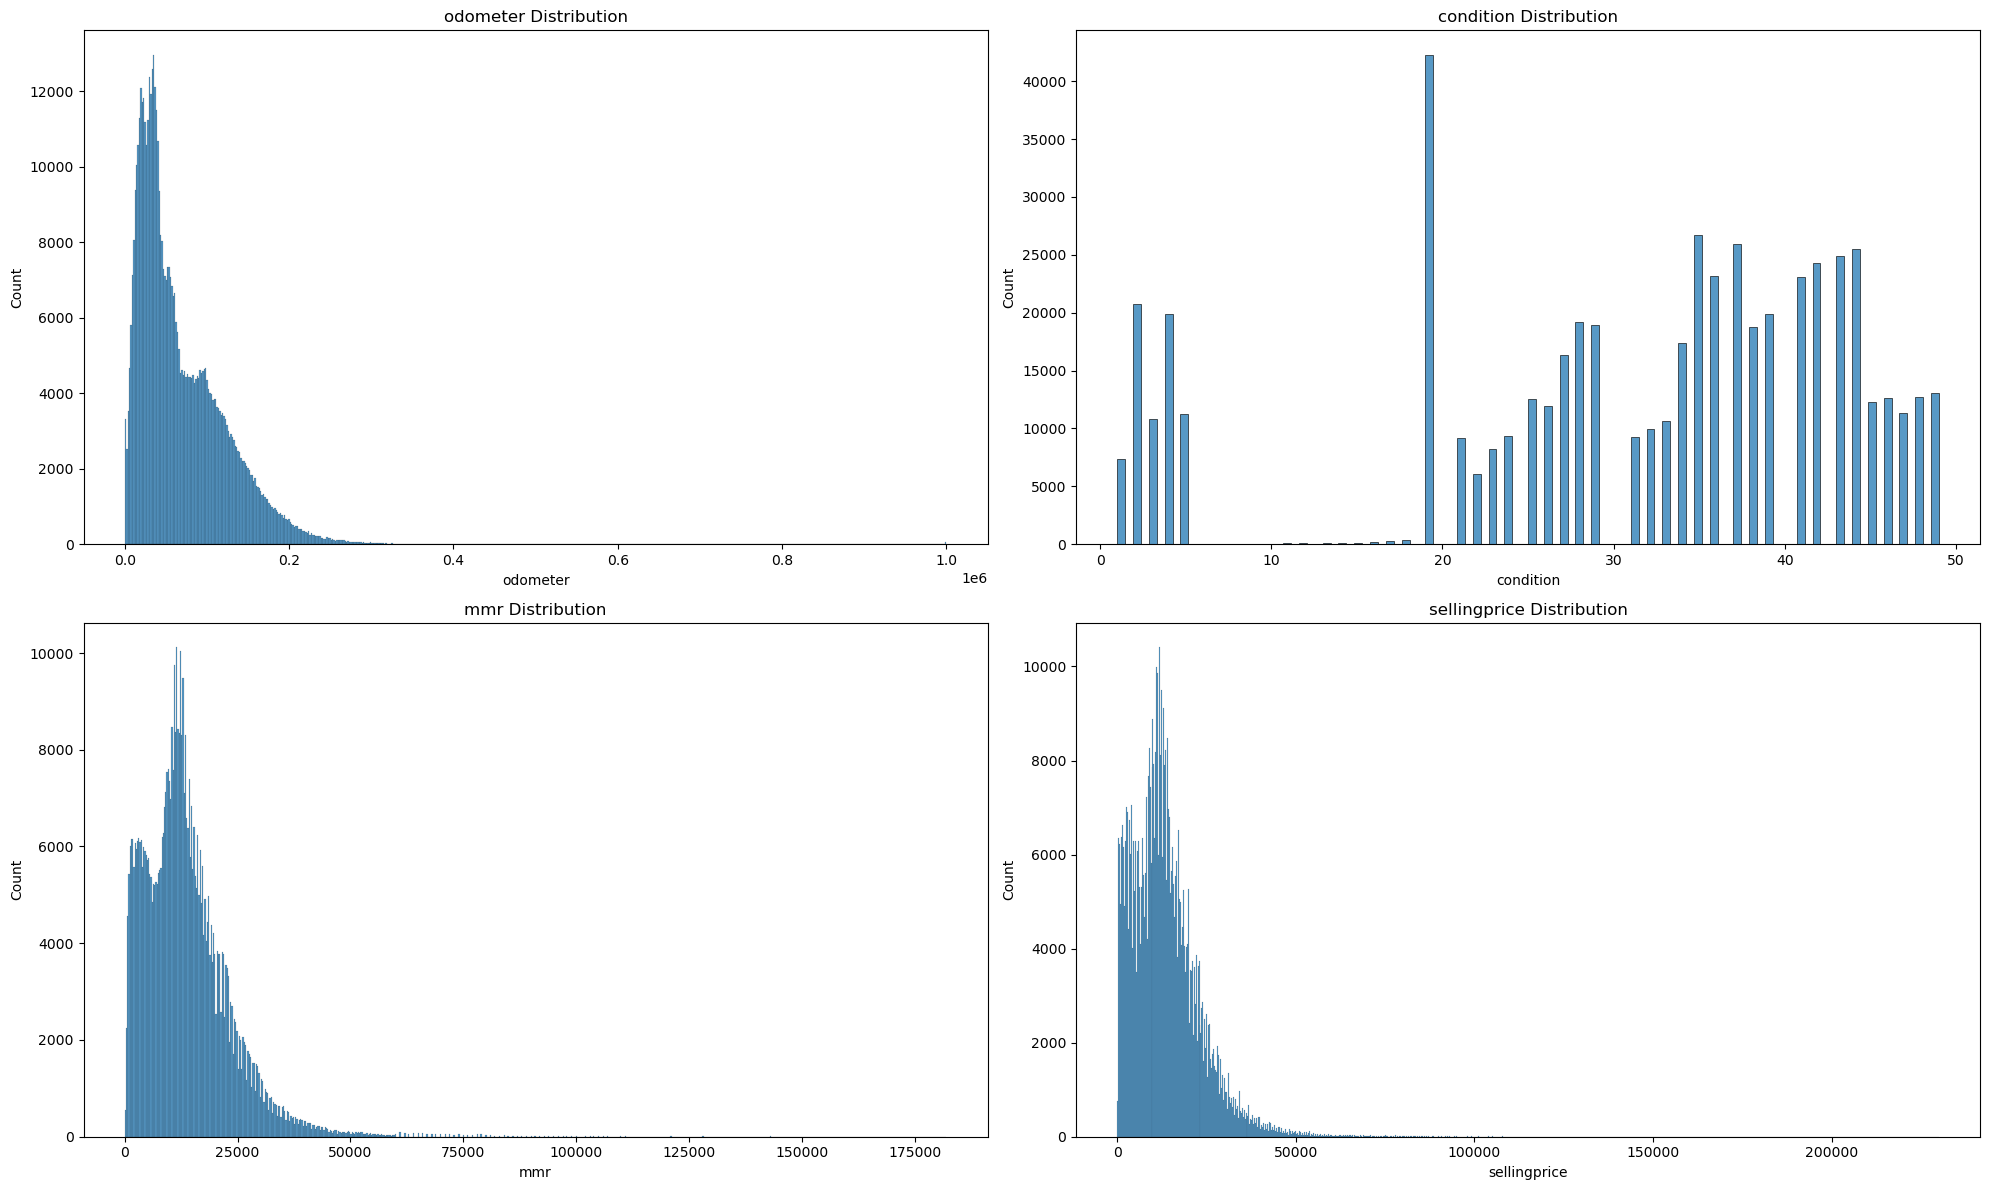

In [11]:
#Distribution of the features before filling in missing values
 
# Set up the matplotlib figure for histograms
plt.figure(figsize=(20, 12))

# Histograms of Numerical Features
plt.subplot(2, 2, 1)
sns.histplot(cp_data['odometer'], kde=False)
plt.title('odometer Distribution')

plt.subplot(2, 2, 2)
sns.histplot(cp_data['condition'], kde=False)
plt.title('condition Distribution')

plt.subplot(2, 2, 3)
sns.histplot(cp_data['mmr'], kde=False)
plt.title('mmr Distribution')

plt.subplot(2, 2, 4)
sns.histplot(cp_data['sellingprice'], kde=False)
plt.title('sellingprice Distribution')

plt.tight_layout()
plt.show()

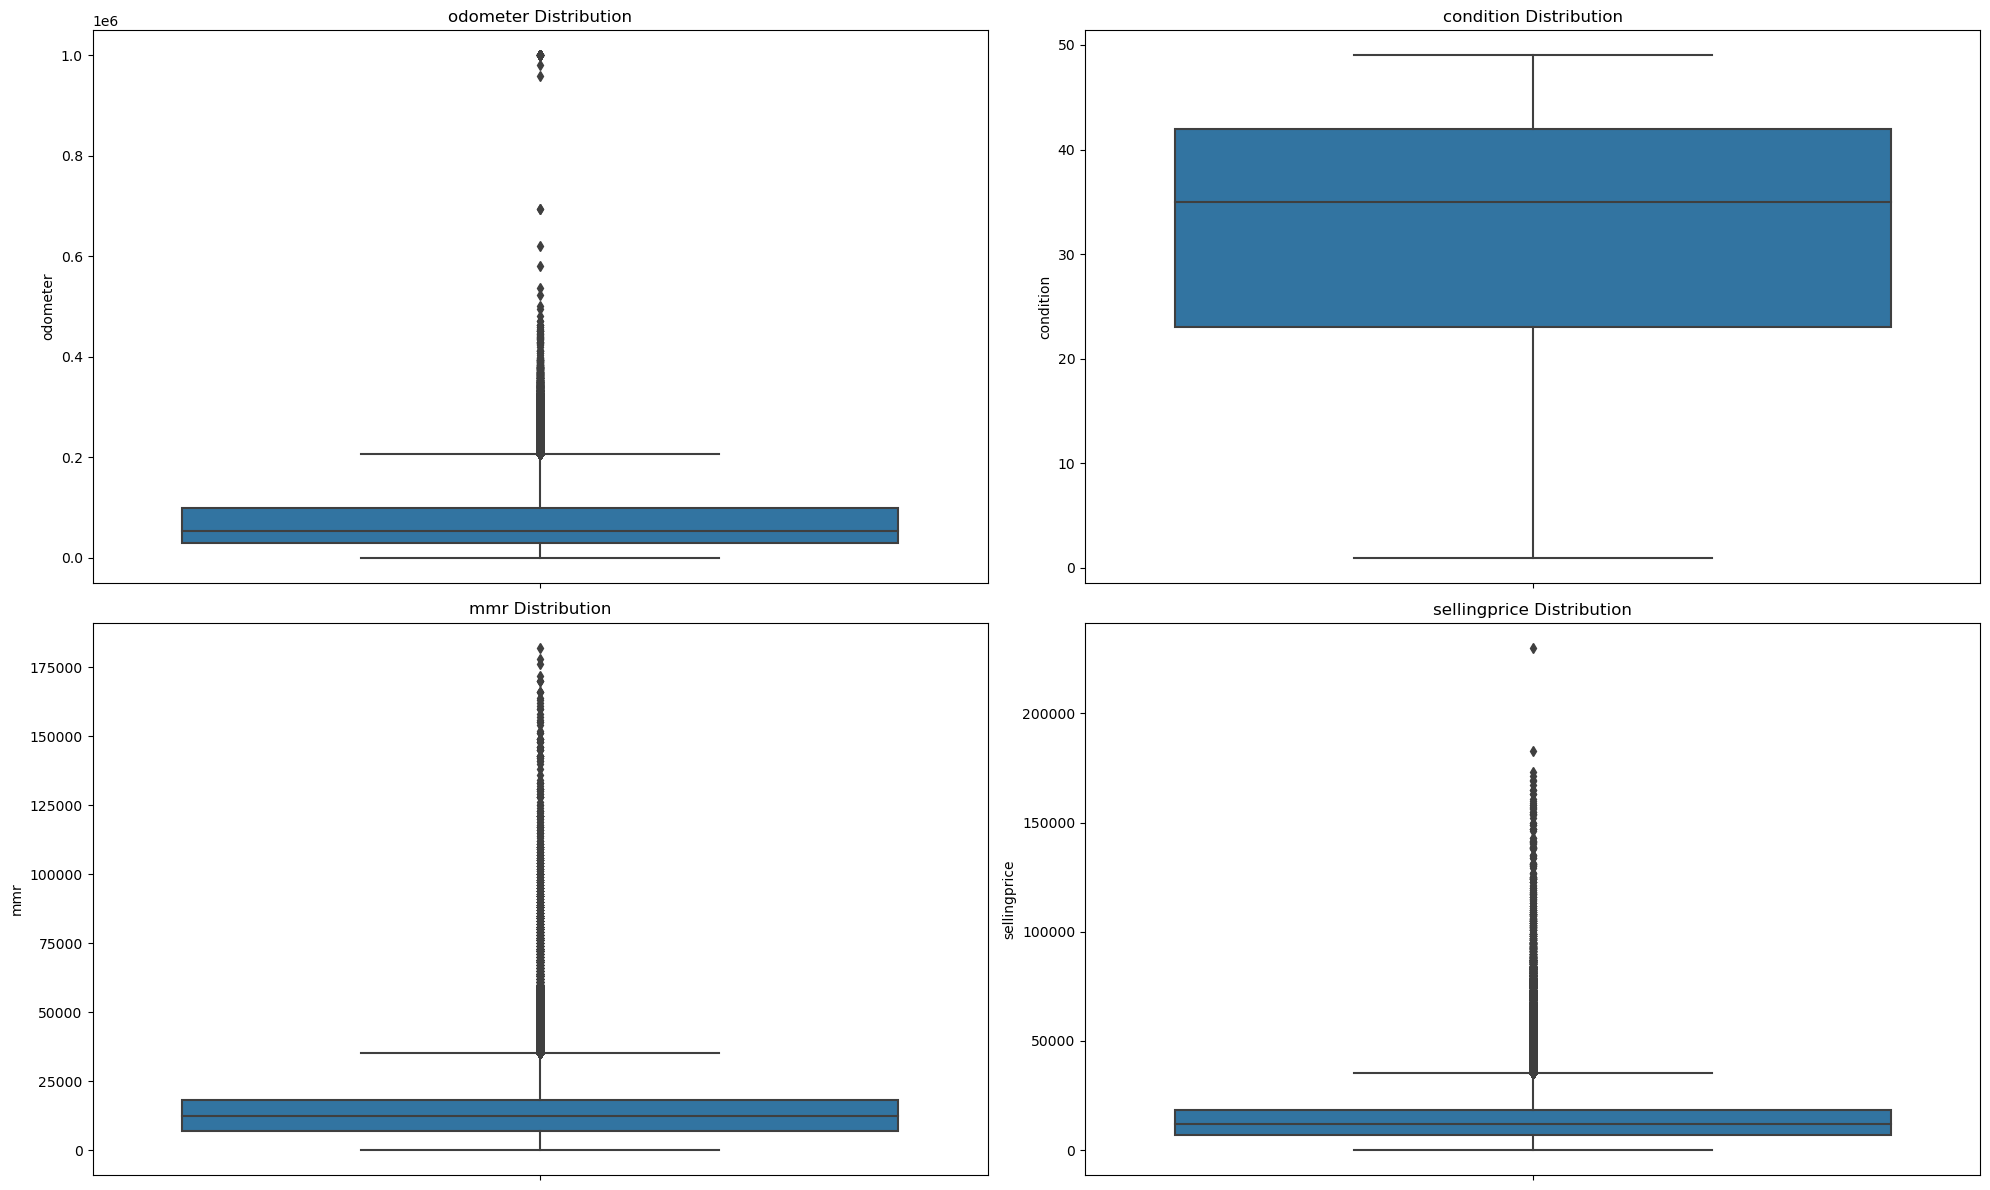

In [12]:
#Checking for outliers in the dataset

# Set up the matplotlib figure for boxplot
plt.figure(figsize=(20, 12))

# Boxplots of Numerical Features
plt.subplot(2, 2, 1)
sns.boxplot(y=cp_data['odometer'])
plt.title('odometer Distribution')

plt.subplot(2, 2, 2)
sns.boxplot(y=cp_data['condition'])
plt.title('condition Distribution')

plt.subplot(2, 2, 3)
sns.boxplot(y=cp_data['mmr'])
plt.title('mmr Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(y=cp_data['sellingprice'])
plt.title('sellingprice Distribution')

plt.tight_layout()
plt.show()

In [13]:
# Define columns for imputation and dropping
replace_with_mode = ["make", "model", "body", "trim", "transmission", "condition"]
replace_with_mean = ["odometer", "mmr", "sellingprice"]
drop_features = ["vin", "transmission", "color", "interior", "saledate"]

# Replace missing values with mode for specified columns
for feature in replace_with_mode:
    cp_data[feature].fillna(cp_data[feature].mode()[0], inplace=True)

# Replace missing values with mean for specified columns
for feature in replace_with_mean:
    cp_data[feature].fillna(cp_data[feature].mean(), inplace=True)
    
#Drop unnecessary columns
cp_data.drop(columns= drop_features, inplace=True)

# Verify that there are no more missing values
print(cp_data.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
state           0
condition       0
odometer        0
seller          0
mmr             0
sellingprice    0
dtype: int64


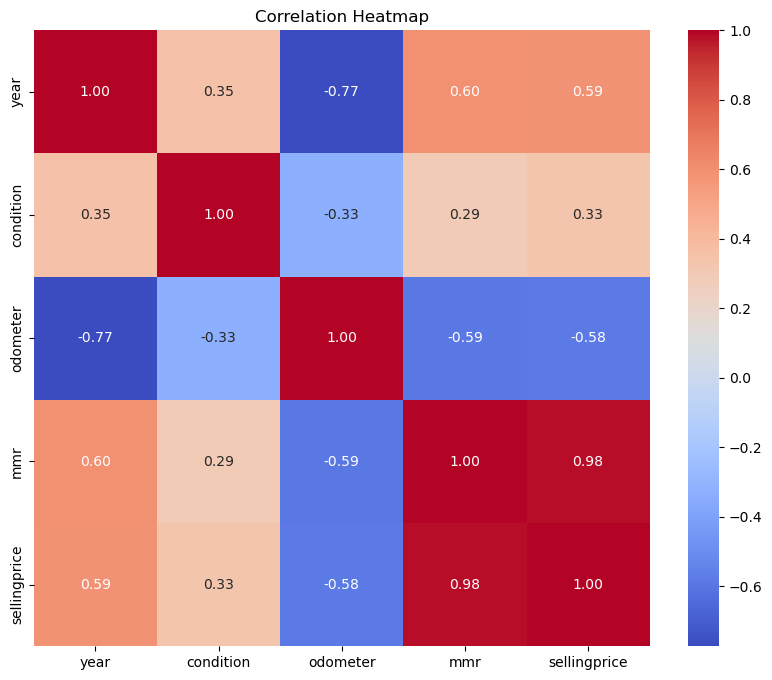

In [14]:
#checking for correlation between columns 
    
# Calculate the correlation matrix
corr_matrix = cp_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

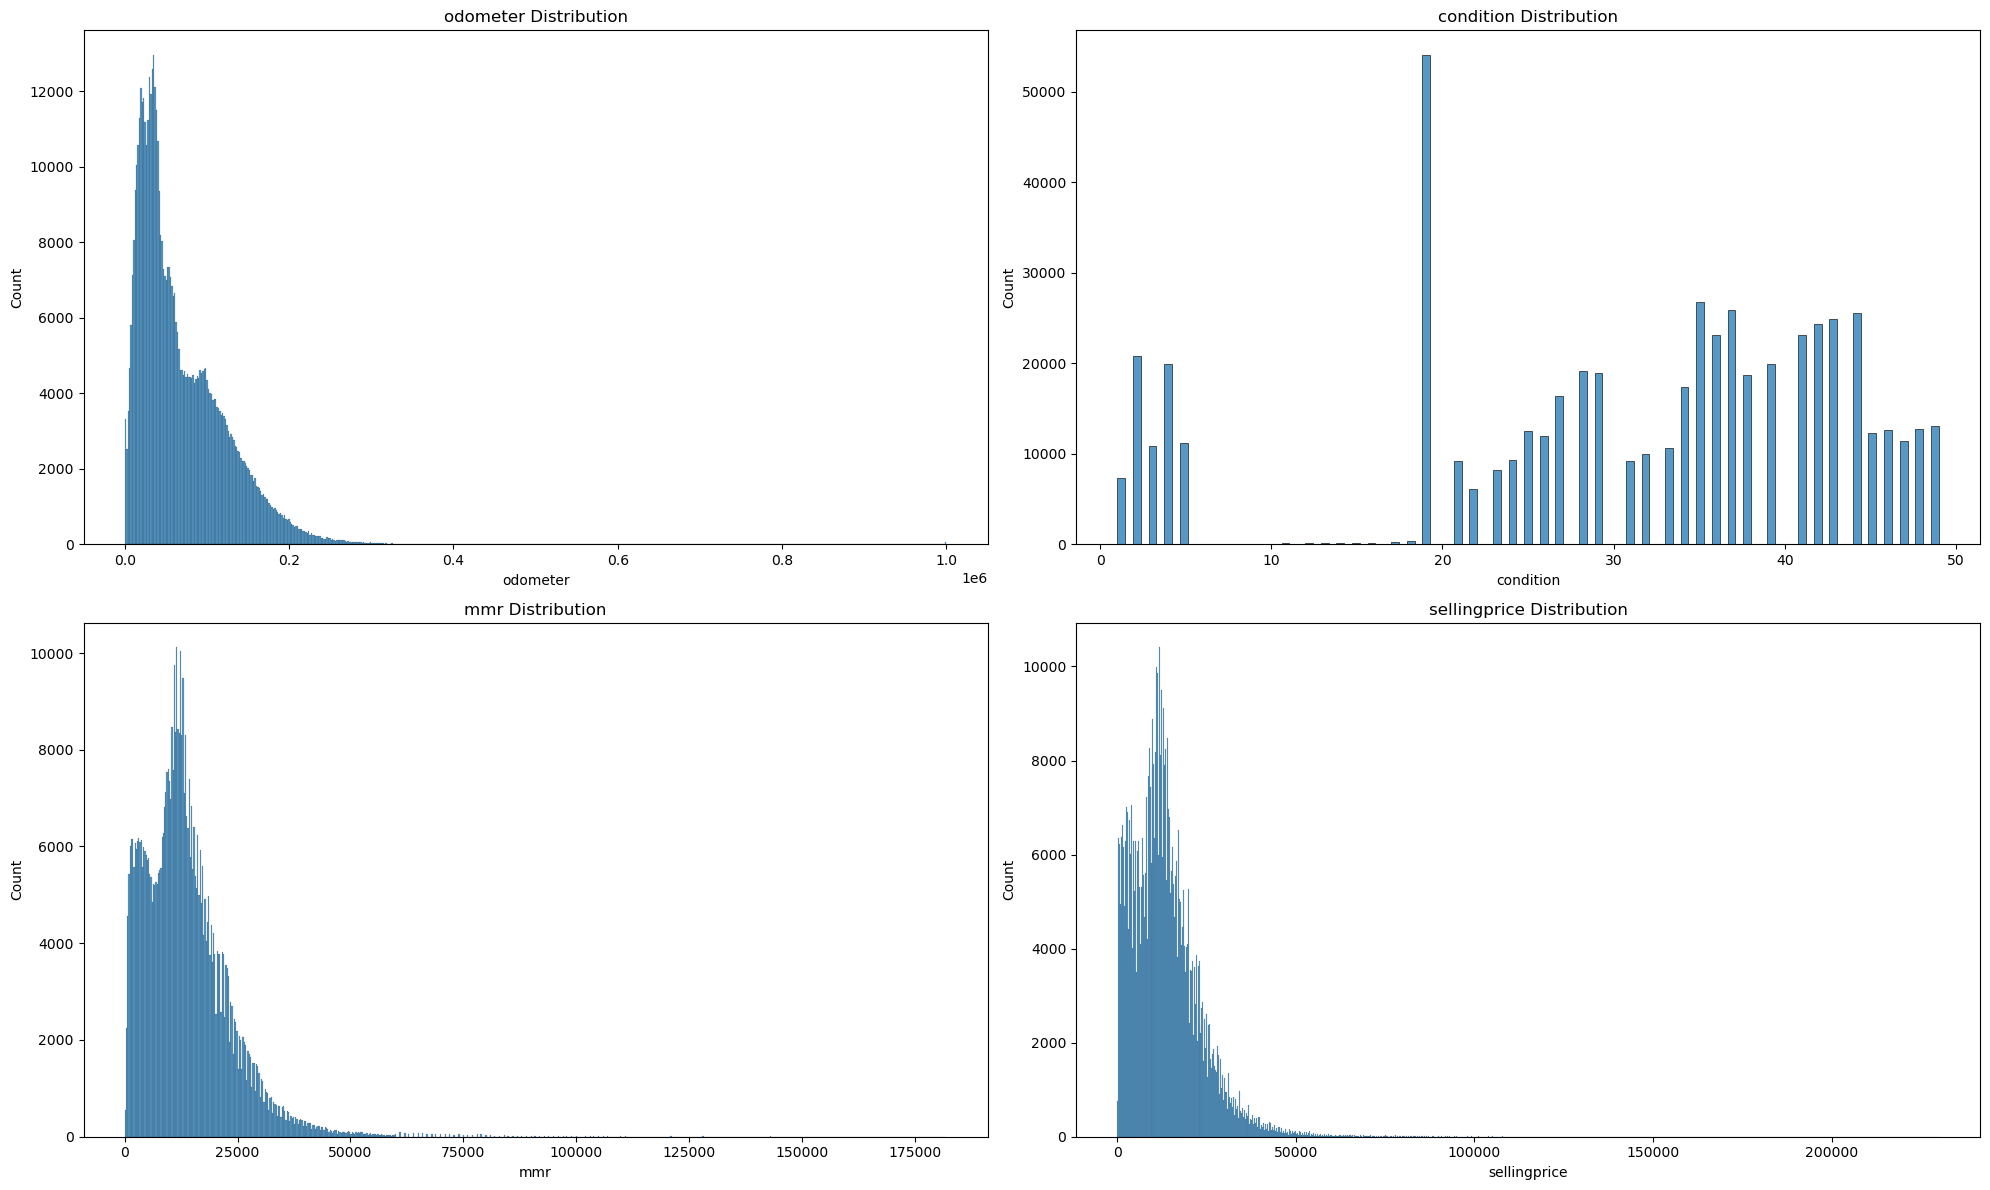

In [15]:
#Distribution of the features after filling in missing values
 
# Set up the matplotlib figure for histograms
plt.figure(figsize=(20, 12))

# Histograms of Numerical Features
plt.subplot(2, 2, 1)
sns.histplot(cp_data['odometer'], kde=False)
plt.title('odometer Distribution')

plt.subplot(2, 2, 2)
sns.histplot(cp_data['condition'], kde=False)
plt.title('condition Distribution')

plt.subplot(2, 2, 3)
sns.histplot(cp_data['mmr'], kde=False)
plt.title('mmr Distribution')

plt.subplot(2, 2, 4)
sns.histplot(cp_data['sellingprice'], kde=False)
plt.title('sellingprice Distribution')

plt.tight_layout()
plt.show()

In [16]:
class EcommercePrediction:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_val = None
        self.y_train = None
        self.y_val = None
        self.model = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path)

    def preprocess_data(self):
        columns_to_check = ["odometer", "condition", "mmr", "sellingprice"]
        self.data = self.remove_outliers(self.data, columns_to_check)
        self.X = self.data[["year", "odometer", "condition", "mmr"]]
        self.y = self.data["sellingprice"]

        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)
    
    def remove_outliers(self, df, columns):
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df

    def split_data(self):
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X, self.y, test_size=0.3, random_state=42)

    def evaluate_model(self):
        val_prediction = self.model.predict(self.X_val)
        mse = mean_squared_error(self.y_val, val_prediction)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_val, val_prediction)
        print(f'Model RMSE: {rmse}')
        print(f'Model R^2 Score: {r2}')
        return rmse, r2

    def save_model(self, model_path):
        joblib.dump(self.model, model_path)

    def load_model(self, model_path):
        self.model = joblib.load(model_path)

# Linear Regressor
class LinearRegresionModel(EcommercePrediction):
    def train_model(self):
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)
        
# Random Forest Regressor
class RandomForestModel(EcommercePrediction):
    def train_model(self):
        self.model = RandomForestRegressor(n_estimators=300,max_depth=7,random_state=42)
        self.model.fit(self.X_train, self.y_train)

# Decision Tree Regressor
class DecisionTreeModel(EcommercePrediction):
    def train_model(self):
        self.model = DecisionTreeRegressor(random_state=42)
        self.model.fit(self.X_train, self.y_train)

# Lasso RegressionModel
class LassoRegressionModel(EcommercePrediction):
    def train_model(self):
        self.model = Lasso(alpha=0.1)  # Adjust alpha as needed
        self.model.fit(self.X_train, self.y_train)

In [17]:
# Usage for LinearRegressionModel
dt_model = LinearRegresionModel(file_path)
dt_model.load_data()
dt_model.preprocess_data()
dt_model.split_data()
dt_model.train_model()
dt_rmse, dt_r2 = dt_model.evaluate_model()
dt_model.save_model('Linear_regression_model.pkl')

Model RMSE: 1516.7600381829252
Model R^2 Score: 0.9589636342030312


In [18]:
# Usage for DecisionTreeModel
dt_model = DecisionTreeModel(file_path)
dt_model.load_data()
dt_model.preprocess_data()
dt_model.split_data()
dt_model.train_model()
dt_rmse, dt_r2 = dt_model.evaluate_model()
dt_model.save_model('decision_tree_model.pkl')

Model RMSE: 1930.5158727477929
Model R^2 Score: 0.9335213961201885


In [19]:
# Usage for RandomForestModel
dt_model = RandomForestModel(file_path)
dt_model.load_data()
dt_model.preprocess_data()
dt_model.split_data()
dt_model.train_model()
dt_rmse, dt_r2 = dt_model.evaluate_model()
dt_model.save_model('random_forest_model.pkl')

Model RMSE: 1429.9531437783598
Model R^2 Score: 0.9635263899611273


In [20]:
# Usage for lassoRegressionModel
dt_model = LassoRegressionModel(file_path)
dt_model.load_data()
dt_model.preprocess_data()
dt_model.split_data()
dt_model.train_model()
dt_rmse, dt_r2 = dt_model.evaluate_model()
dt_model.save_model('lasso_regression_model.pkl')

Model RMSE: 1516.7585828115216
Model R^2 Score: 0.9589637129539518


## Conclusion

Based on the models' prediction errors (RMSE) and  how well the model fit the dataset (R^2 Score), the Random Forest Model is preferred because it performed better than the others because it has the lowest prediction erros with **Model RMSE: 1429.9531437783598** and the highest relative model fitness with **Model R^2 Score: 0.9635263899611273.**